In [28]:
import pandas as pd
import numpy as np
import requests
import json
from pymongo import MongoClient
from dotenv import load_dotenv
import os
import base64
from PIL import Image
from io import BytesIO
import math
import matplotlib.pyplot as plt

In [29]:
load_dotenv()

True

In [19]:
mongoDBURL = os.getenv('mongoDBURL')


client = MongoClient(mongoDBURL)

db = client['test']

users_collection = db['user-collection']
websitepics_collection = db['websitepics-collection']

alpha_brothers = list(users_collection.find({
    'Position': {'$in': [2, 3, 5]},
    'Class': 'Alpha'
}))

alpha_names = sorted([brother['FirstName'] for brother in alpha_brothers])

beta_brothers = list(users_collection.find({
    'Position': {'$in': [2, 3, 5]},
    'Class': 'Beta'
}))

beta_names = sorted([brother['FirstName'] for brother in beta_brothers])

gamma_brothers = list(users_collection.find({
    'Position': {'$in': [2, 3, 5]},
    'Class': 'Gamma'
}))

gamma_names = sorted([brother['FirstName'] for brother in gamma_brothers])

delta_brothers = list(users_collection.find({
    'Position': {'$in': [2, 3, 5]},
    'Class': 'Delta'
}))

delta_names = sorted([brother['FirstName'] for brother in delta_brothers])

alpha_names[8] = 'Gulotty'
alpha_names[14] = 'Kim'
alpha_names[18] = 'Richard'



In [8]:
beta_brothers[11]

{'_id': ObjectId('667312de6fcc704e7b2bb09e'),
 'BUEmail': 'jperucci@bu.edu',
 'FirstName': 'Julianna',
 'LastName': 'Perucci',
 'PhoneNumber': '(845) 453-0640',
 'Birthday': '8/19/2005',
 'GradYear': 2027,
 'Colleges': ['CDS'],
 'Major': ['Data Science'],
 'Minor': [''],
 'Position': 3,
 'createdAt': datetime.datetime(2024, 6, 19, 17, 18, 22, 123000),
 'updatedAt': datetime.datetime(2025, 1, 2, 8, 56, 30, 455000),
 '__v': 0,
 'Class': 'Beta',
 'Interests': [],
 'ProfilePhoto': '66e22fb147978d161d02e13d',
 'websitePic': '676f6e7dc48fa7b4ebc62595',
 'Eboard_Position': 'VP of Internal Affairs'}

In [84]:
pics_link = "https://raw.githubusercontent.com/pblej/ktpbostonu.github.io/main/images/Alpha%20Headshots"
total_space = 0

file_url = f"{pics_link}/{alpha_names[-4]}1.jpg" #Victor!
response = requests.get(file_url)
response.raise_for_status()

img_buffer = BytesIO()
img = Image.open(BytesIO(response.content))
img = img.resize((img.width // 2, img.height // 2), Image.Resampling.LANCZOS)

original_size = len(response.content) / 1024
new_quality = 20

img.save(img_buffer, format="JPEG", quality=new_quality)

compressed_size_kb = len(img_buffer.getvalue()) / 1024

compressed_img = Image.open(img_buffer)

img_buffer.seek(0)  # Reset buffer position
img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')

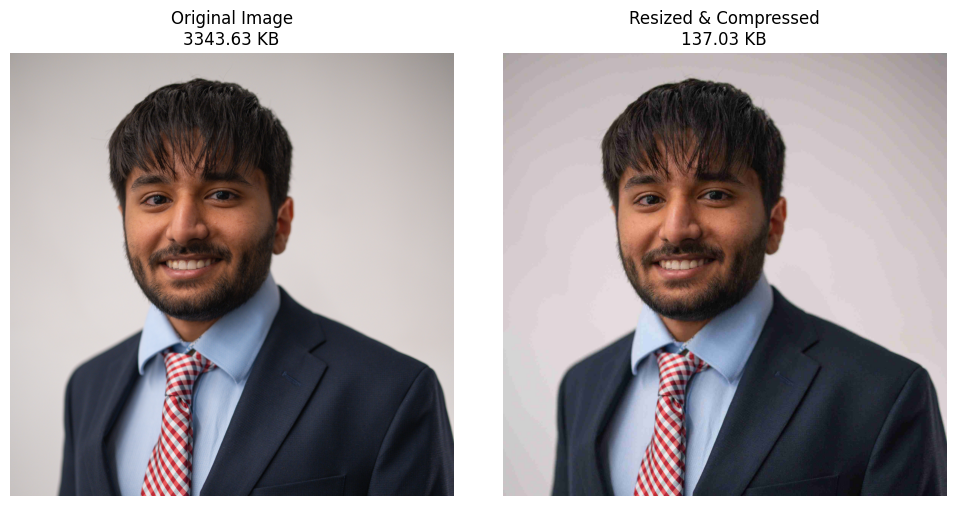

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title(f"Original Image\n{original_size:.2f} KB")
axs[0].axis("off")

axs[1].imshow(compressed_img)
axs[1].set_title(f"Resized & Compressed\n{compressed_size_kb:.2f} KB")
axs[1].axis("off")

plt.tight_layout()
plt.show()

In [127]:
pics_link = "https://raw.githubusercontent.com/pblej/ktpbostonu.github.io/main/images/Beta%20Headshots"
total_space = 0
alpha_brothers = sorted(alpha_brothers, key=lambda x: x['FirstName'])
beta_brothers = sorted(beta_brothers, key=lambda x: x['FirstName'])

beta_names[3] = "Dom"
for i in range(3,len(beta_brothers)):
    
    file_url = f"{pics_link}/{beta_names[i]}1.jpg" #Victor!
    response = requests.get(file_url)
    response.raise_for_status()
    img_buffer = BytesIO()
    img = Image.open(BytesIO(response.content))
    img = img.resize((img.width // 2, img.height // 2), Image.Resampling.LANCZOS)

    original_size = len(response.content) / 1024
    new_quality = 20

    img.save(img_buffer, format="JPEG", quality=new_quality)

    compressed_size_kb = len(img_buffer.getvalue()) / 1024

    compressed_img = Image.open(img_buffer)
    total_space += compressed_size_kb
    
    img_buffer.seek(0)  # Reset buffer position
    img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')
    
    data = {
    "data": img_base64
    }

    result = websitepics_collection.insert_one(data)
    inserted_id = result.inserted_id
    print(f"inserted pic for {beta_names[i]}: {inserted_id}")
    
    response = requests.put(f"http://localhost:3000/users/{str(beta_brothers[i]['_id'])}", json={
        "Position": beta_brothers[i]['Position'],
        "websitePic": str(inserted_id)
    })

    if response.status_code == 200:
        print(f"Updated {beta_brothers[i]['FirstName']} successful")
    else:
        print(f"Update failed with status code {response.status_code}: {response.text}")
    print()

print("IM HIM")


inserted pic for Dom: 676f6e7ac48fa7b4ebc6258e
Updated Dominic successful

inserted pic for Eric: 676f6e7bc48fa7b4ebc6258f
Updated Eric successful

inserted pic for Fynn: 676f6e7bc48fa7b4ebc62590
Updated Fynn successful

inserted pic for Ishan: 676f6e7cc48fa7b4ebc62591
Updated Ishan successful

inserted pic for Jack: 676f6e7cc48fa7b4ebc62592
Updated Jack successful

inserted pic for Jake: 676f6e7cc48fa7b4ebc62593
Updated Jake successful

inserted pic for Jennifer: 676f6e7dc48fa7b4ebc62594
Updated Jennifer successful

inserted pic for Julianna: 676f6e7dc48fa7b4ebc62595
Updated Julianna successful

inserted pic for Kyle: 676f6e7ec48fa7b4ebc62596
Updated Kyle successful

inserted pic for Makayla: 676f6e7ec48fa7b4ebc62597
Updated Makayla successful

inserted pic for Mikayla: 676f6e7fc48fa7b4ebc62598
Updated Mikayla successful

inserted pic for Nick: 676f6e7fc48fa7b4ebc62599
Updated Nick successful

inserted pic for Nikki: 676f6e80c48fa7b4ebc6259a
Updated Nikki successful

inserted pic for 

/var/folders/lt/h9nxt46j4r7dc2xptjh4w0300000gn/T/ipykernel_11503/3057183098.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


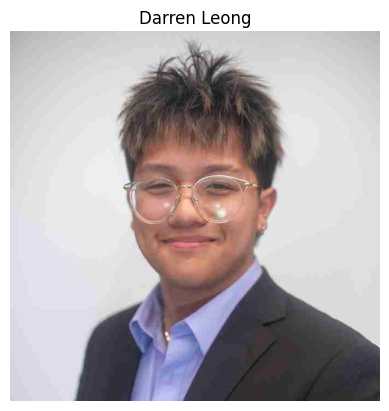

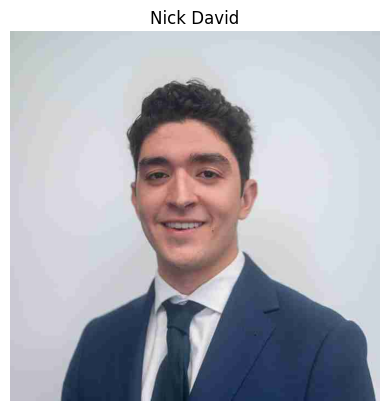

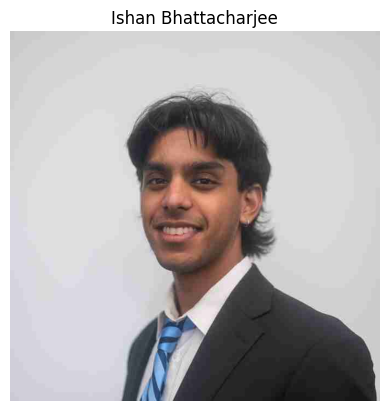

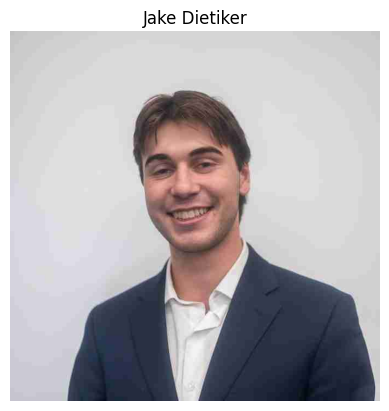

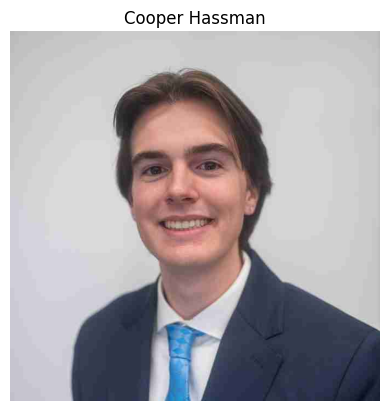

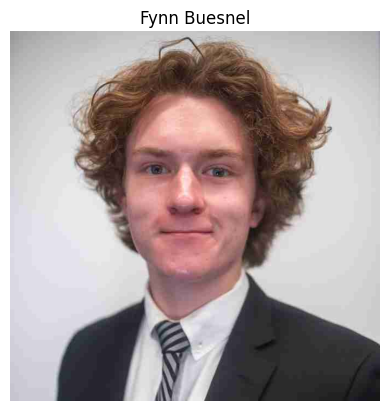

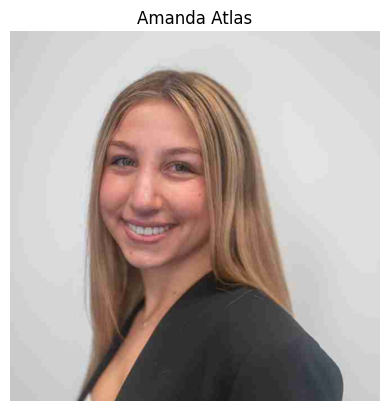

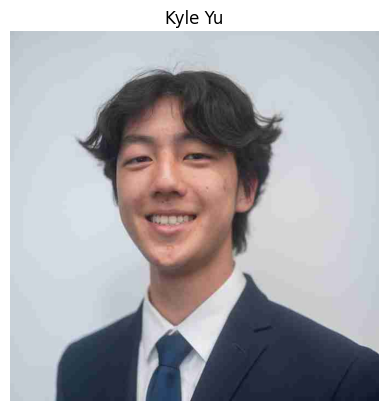

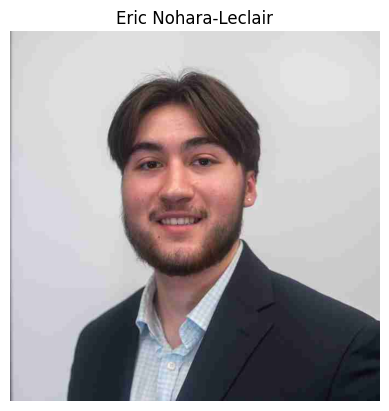

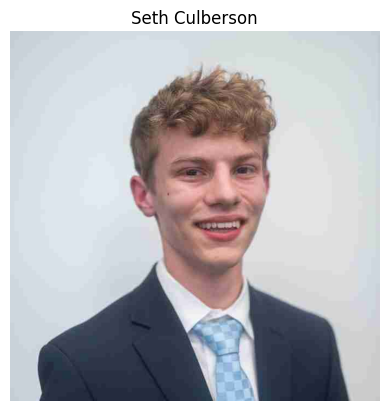

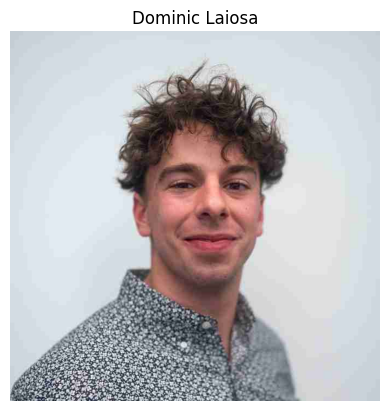

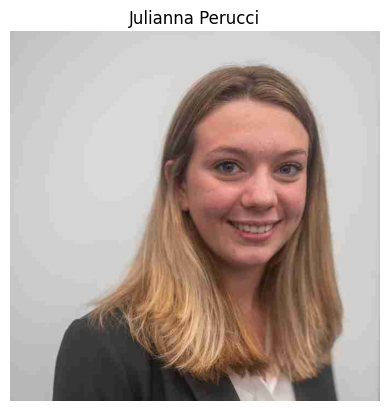

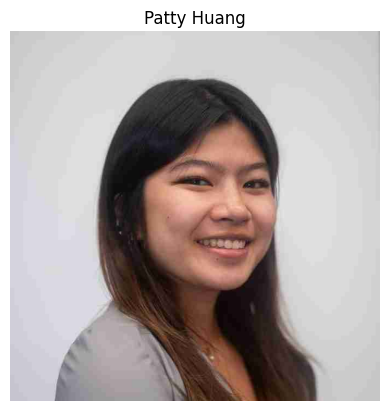

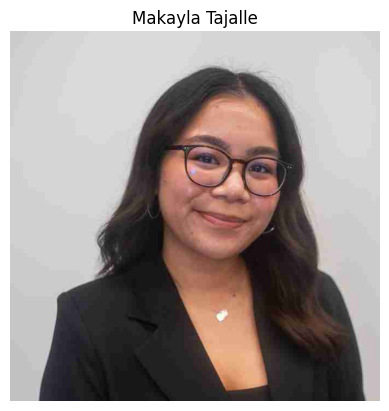

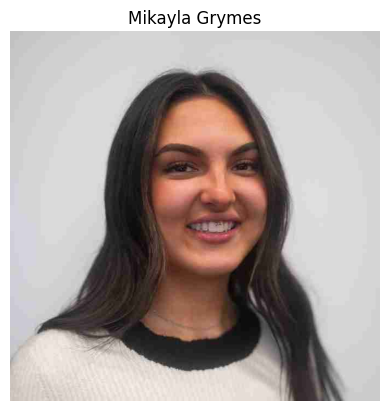

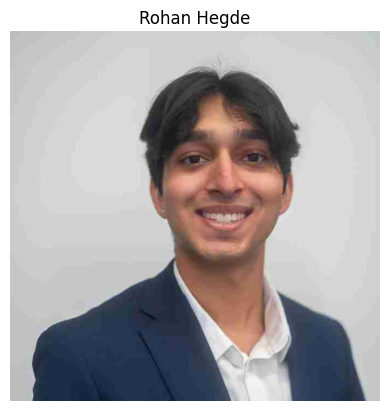

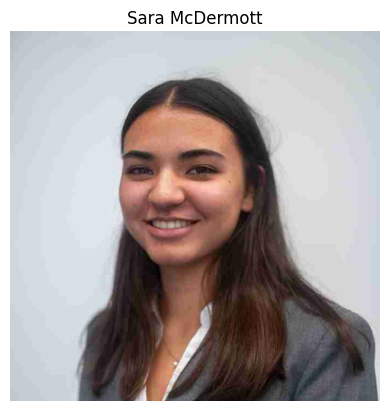

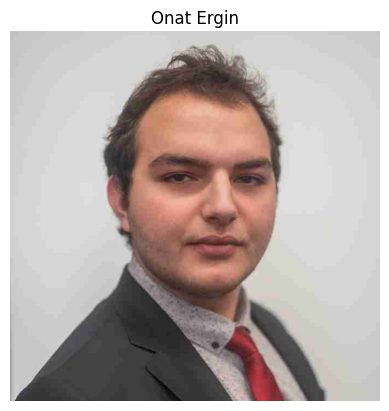

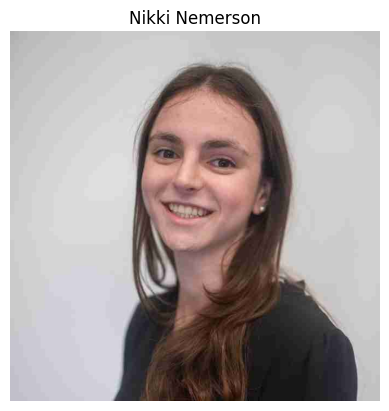

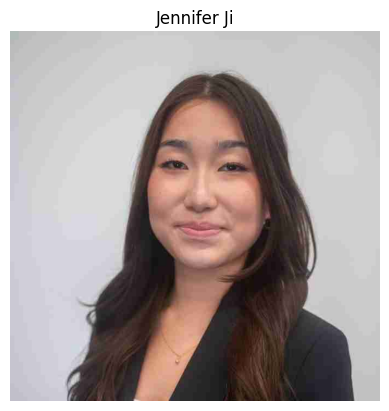

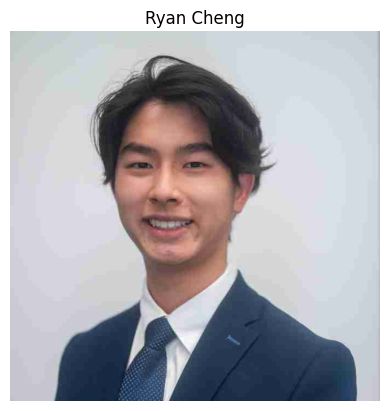

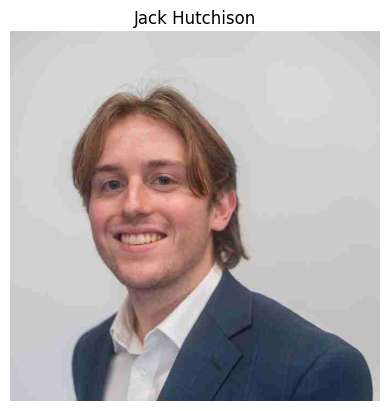

In [130]:
for i in range(len(beta_brothers)):
    picid = beta_brothers[i]['websitePic']
    name = beta_brothers[i]['FirstName'] + " " + beta_brothers[i]['LastName']
    
    # Fetch the Base64 image
    response = requests.get(f"http://localhost:3000/websitepics/{picid}")
    data = response.json()
    
    if response.status_code == 200:
        base64_image = data['data']
        
        # Decode Base64 and create an image
        image_data = base64.b64decode(base64_image)
        image = Image.open(BytesIO(image_data))
        
        # Plot the image
        plt.figure()
        plt.imshow(image)
        plt.axis('off')
        plt.title(name)

plt.show()

In [48]:
gamma_brothers = sorted(gamma_brothers, key=lambda x: x['FirstName'])
print(gamma_brothers[7])

{'_id': ObjectId('667312df6fcc704e7b2bb0c0'), 'BUEmail': 'jjk29@bu.edu', 'FirstName': 'John', 'LastName': 'Kim', 'PhoneNumber': '(949) 395-2225', 'Birthday': '9/5/2004', 'GradYear': 2027, 'Colleges': ['CAS'], 'Major': ['Computer Science'], 'Minor': [''], 'Position': 3, 'createdAt': datetime.datetime(2024, 6, 19, 17, 18, 23, 759000), 'updatedAt': datetime.datetime(2025, 1, 2, 8, 37, 43, 783000), '__v': 0, 'Interests': ['Eating', 'Sleeping', 'Golf', 'Football'], 'Class': 'Gamma', 'ProfilePhoto': '66bc25f1eef1084a5131611f', 'LinkedIn': 'john-kim2', 'Instagram': 'Jokimo12', 'websitePic': '676f7426c48fa7b4ebc625b3', 'Eboard_Position': 'VP of Technical Development'}


In [49]:
pics_link = "/Users/toto211738/Desktop/Gamma Headshots"
total_space = 0
gamma_brothers = sorted(gamma_brothers, key=lambda x: x['FirstName'])

i = 7  # Only process the 11th index

file_path = os.path.join(pics_link, f"{gamma_names[i]}Main.jpeg")
img_buffer = BytesIO()

if os.path.exists(file_path):
    # Open the image file and simulate it being read into a buffer
    with open(file_path, 'rb') as img_file:
        img = Image.open(BytesIO(img_file.read()))
    print(f"Successfully loaded image: {file_path}")
else:
    print(f"File not found: {file_path}")

img = img.resize((img.width // 2, img.height // 2), Image.Resampling.LANCZOS)
new_quality = 20

img.save(img_buffer, format="JPEG", quality=new_quality)
compressed_size_kb = len(img_buffer.getvalue()) / 1024
compressed_img = Image.open(img_buffer)
total_space += compressed_size_kb

img_buffer.seek(0)  # Reset buffer position
img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')

data = {
    "data": img_base64
}

result = websitepics_collection.insert_one(data)
inserted_id = result.inserted_id
print(f"inserted pic for {gamma_names[i]}: {inserted_id}")

response = requests.put(f"http://localhost:3000/users/{str(gamma_brothers[i]['_id'])}", json={
    "Position": gamma_brothers[i]['Position'],
    "websitePic": str(inserted_id)
})

if response.status_code == 200:
    print(f"Updated {gamma_brothers[i]['FirstName']} successful")
else:
    print(f"Update failed with status code {response.status_code}: {response.text}")

print("IM HIM")


Successfully loaded image: /Users/toto211738/Desktop/Gamma Headshots/JohnMain.jpeg
inserted pic for John: 677f2475c6a651081e5ad61e
Updated John successful
IM HIM


In [37]:
print(gamma_names[7])
gamma_brothers = sorted(gamma_brothers, key=lambda x: x['FirstName'])
gamma_brothers[7]

John


{'_id': ObjectId('667312df6fcc704e7b2bb0c0'),
 'BUEmail': 'jjk29@bu.edu',
 'FirstName': 'John',
 'LastName': 'Kim',
 'PhoneNumber': '(949) 395-2225',
 'Birthday': '9/5/2004',
 'GradYear': 2027,
 'Colleges': ['CAS'],
 'Major': ['Computer Science'],
 'Minor': [''],
 'Position': 3,
 'createdAt': datetime.datetime(2024, 6, 19, 17, 18, 23, 759000),
 'updatedAt': datetime.datetime(2025, 1, 2, 8, 37, 43, 783000),
 '__v': 0,
 'Interests': ['Eating', 'Sleeping', 'Golf', 'Football'],
 'Class': 'Gamma',
 'ProfilePhoto': '66bc25f1eef1084a5131611f',
 'LinkedIn': 'john-kim2',
 'Instagram': 'Jokimo12',
 'websitePic': '676f7426c48fa7b4ebc625b3',
 'Eboard_Position': 'VP of Technical Development'}

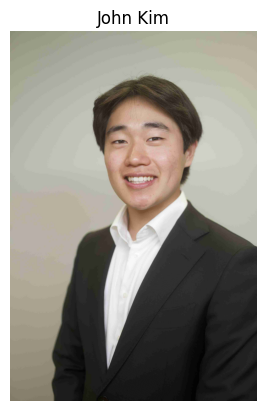

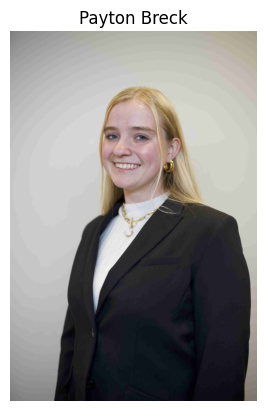

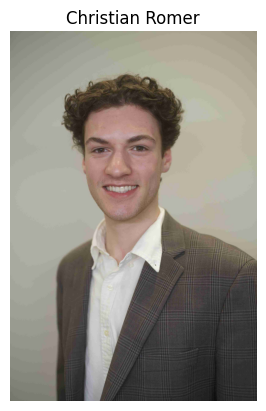

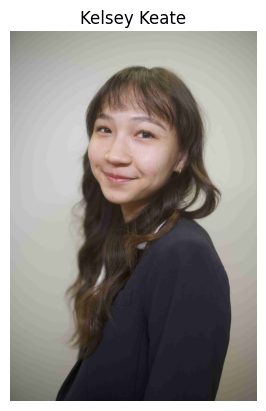

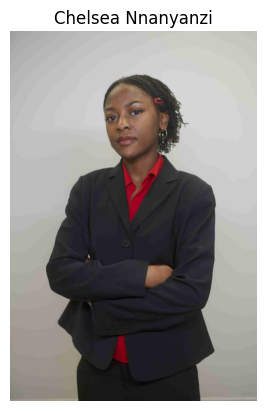

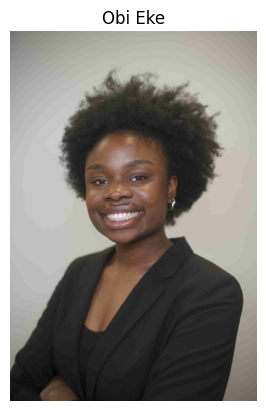

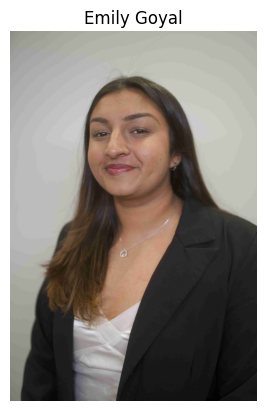

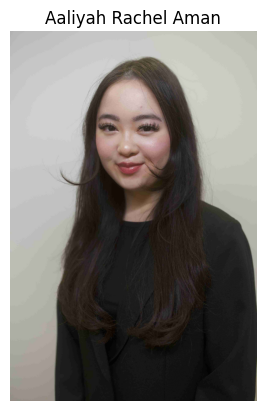

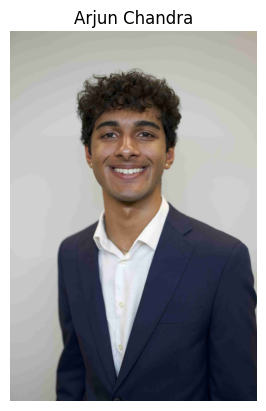

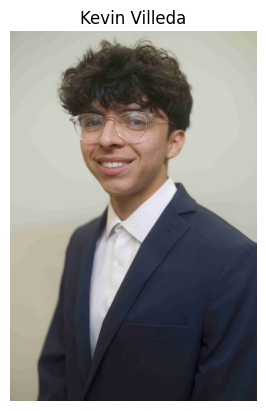

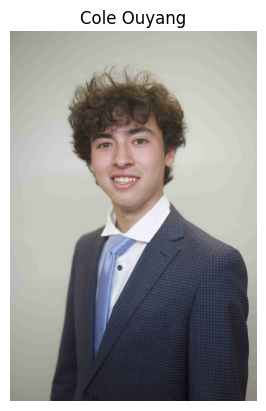

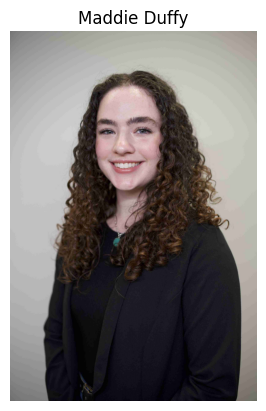

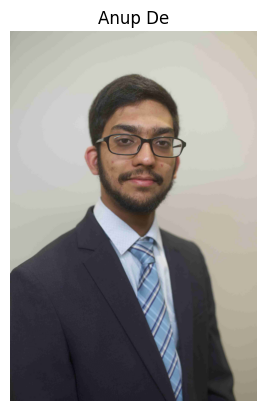

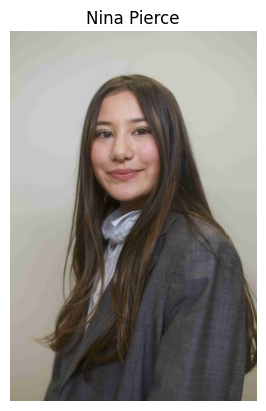

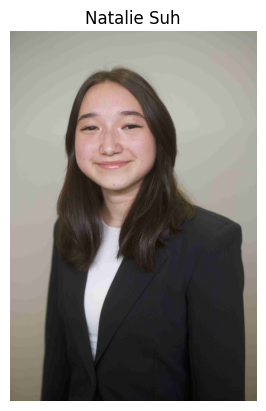

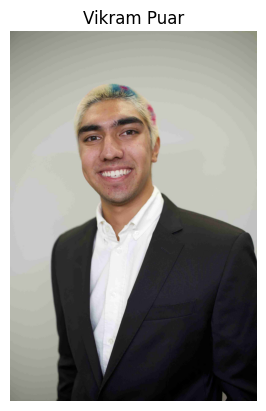

In [140]:
for brother in gamma_brothers[7]:
    if not brother.get('websitePic'):
        continue

    picid = brother['websitePic']
    name = f"{brother['FirstName']} {brother['LastName']}"
    
    try:
        # Fetch the Base64 image
        response = requests.get(f"http://localhost:3000/websitepics/{picid}")
        response.raise_for_status()  # Raise an error for bad status codes
        data = response.json()

        if 'data' in data:
            base64_image = data['data']
            
            # Decode Base64 and create an image
            image_data = base64.b64decode(base64_image)
            image = Image.open(BytesIO(image_data))
            
            # Plot the image
            plt.figure()
            plt.imshow(image)
            plt.axis('off')
            plt.title(name)
    except requests.RequestException as e:
        print(f"Error fetching image for {name}: {e}")
    except KeyError:
        print(f"Unexpected response format for {name}")

plt.show()

In [ ]:
pics_link = "/Users/toto211738/Desktop/KTP Delta Headshots"
total_space = 0
delta_brothers = sorted(delta_brothers, key=lambda x: x['FirstName'])

for i in range(11,len(delta_brothers)):
    
    file_path = os.path.join(pics_link, f"{delta_names[i]}Main.jpeg")
    # response = requests.get(file_url)
    # response.raise_for_status()
    img_buffer = BytesIO()
    # img = Image.open(BytesIO(response.content))
    if os.path.exists(file_path):
        # Open the image file and simulate it being read into a buffer
        with open(file_path, 'rb') as img_file:
            img = Image.open(BytesIO(img_file.read()))
        print(f"Successfully loaded image: {file_path}")
    else:
        print(f"File not found: {file_path}")
        continue
    img = img.resize((img.width // 2, img.height // 2), Image.Resampling.LANCZOS)

    original_size = len(response.content) / 1024
    new_quality = 20

    img.save(img_buffer, format="JPEG", quality=new_quality)

    compressed_size_kb = len(img_buffer.getvalue()) / 1024

    compressed_img = Image.open(img_buffer)
    total_space += compressed_size_kb
    
    img_buffer.seek(0)  # Reset buffer position
    img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')
    
    data = {
    "data": img_base64
    }

    result = websitepics_collection.insert_one(data)
    inserted_id = result.inserted_id
    print(f"inserted pic for {delta_names[i]}: {inserted_id}")
    
    response = requests.put(f"http://localhost:3000/users/{str(delta_brothers[i]['_id'])}", json={
        "Position": delta_brothers[i]['Position'],
        "websitePic": str(inserted_id)
    })

    if response.status_code == 200:
        print(f"Updated {delta_brothers[i]['FirstName']} successful")
    else:
        print(f"Update failed with status code {response.status_code}: {response.text}")
    print()

print("IM HIM")


In [30]:
all_brothers = list(users_collection.find({
    'Position': {'$in': [2, 3, 5]},
}))

names_to_find = ['Cooper', 'Fynn', 'John', 'Joonseo', 'Julianna', 'Kelsey', 'Obi', 'Vikram']
indices = {name: next((index for index, brother in enumerate(all_brothers) if brother['FirstName'] == name), None) for name in names_to_find}
print((indices))

{'Cooper': 38, 'Fynn': 39, 'John': 62, 'Joonseo': 95, 'Julianna': 45, 'Kelsey': 65, 'Obi': 67, 'Vikram': 78}


In [33]:
for i in range(3, len(indices)):
    pics_link = f"/Users/toto211738/Desktop/ktp brother headshots/{names_to_find[i]}1.jpg"
    print(names_to_find[i])
    
    if names_to_find[i] != 'Joonseo':
        deletion_response = requests.delete(f"http://localhost:3000/websitepics/{str(all_brothers[indices[names_to_find[i]]]['websitePic'])}")
        if deletion_response.status_code == 200:
            print(f"Deleted {all_brothers[indices[names_to_find[i]]]['FirstName']}'s pic successful")
        else:
            print(f"Delete failed with status code {deletion_response.status_code}: {deletion_response.text}")
            break

    img_buffer = BytesIO()

    if os.path.exists(pics_link):
        # Open the image file and simulate it being read into a buffer
        with open(pics_link, 'rb') as img_file:
            img = Image.open(BytesIO(img_file.read()))
        print(f"Successfully loaded new image: {pics_link}")
    else:
        print(f"File not found: {pics_link}")
        break

    img_buffer.seek(0)  # Reset buffer position
    img.save(img_buffer, format="JPEG")
    img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')
    data = {
    "data": img_base64
    }

    result = websitepics_collection.insert_one(data)
    inserted_id = result.inserted_id
    print(f"inserted pic for {all_brothers[indices[names_to_find[i]]]['FirstName']}: {inserted_id}")


    response = requests.put(f"http://localhost:3000/users/{str(all_brothers[indices[names_to_find[i]]]['_id'])}", json={
        "Position": all_brothers[indices[names_to_find[i]]]['Position'],
        "websitePic": str(inserted_id)
    })


    if response.status_code == 200:
        print(f"Updated {all_brothers[indices[names_to_find[i]]]['FirstName']} successful")
    else:
        print(f"Update failed with status code {response.status_code}: {response.text}")
    print()


Joonseo
Successfully loaded new image: /Users/toto211738/Desktop/ktp brother headshots/Joonseo1.jpg
inserted pic for Joonseo: 677f04d5c6a651081e5ad618
Updated Joonseo successful

Julianna
Deleted Julianna's pic successful
Successfully loaded new image: /Users/toto211738/Desktop/ktp brother headshots/Julianna1.jpg
inserted pic for Julianna: 677f04d5c6a651081e5ad619
Updated Julianna successful

Kelsey
Deleted Kelsey's pic successful
Successfully loaded new image: /Users/toto211738/Desktop/ktp brother headshots/Kelsey1.jpg
inserted pic for Kelsey: 677f04d6c6a651081e5ad61a
Updated Kelsey successful

Obi
Deleted Obi's pic successful
Successfully loaded new image: /Users/toto211738/Desktop/ktp brother headshots/Obi1.jpg
inserted pic for Obi: 677f04d6c6a651081e5ad61b
Updated Obi successful

Vikram
Deleted Vikram's pic successful
Successfully loaded new image: /Users/toto211738/Desktop/ktp brother headshots/Vikram1.jpg
inserted pic for Vikram: 677f04d7c6a651081e5ad61c
Updated Vikram successful

In [31]:
mongoDBURL = os.getenv('mongoDBURL')
BACKEND_URL = os.getenv('VITE_BACKEND_URL')

client = MongoClient(mongoDBURL)

db = client['test']

users_collection = db['user-collection']
websitepics_collection = db['websitepics-collection']

In [33]:
# Update/Add Indivisual's photo

from bson import ObjectId
user_id = ObjectId('') # User's ID
new_photo_path = "" # Path to the new photo


In [ ]:
user_to_update = users_collection.find_one({"_id": user_id})

if 'WebsitePic' in user_to_update:
        print(f"{user_to_update['FirstName']} already has a website picture")
        print("Deleting current picture")
        deletion_response = requests.delete(f"{BACKEND_URL}/websitepics/{user_to_update['websitePic']}")
        if deletion_response.status_code == 200:
            print(f"Deleted {user_to_update['FirstName']}'s pic successfully")
        else:
            print(f"Delete failed with status code {deletion_response.status_code}: {deletion_response.text}")
        
else:
    print(f"{user_to_update['FirstName']} doesn't have a website picture")

img_buffer = BytesIO()

if os.path.exists(new_photo_path):
    # Open the image file and simulate it being read into a buffer
    with open(new_photo_path, 'rb') as img_file:
        img = Image.open(BytesIO(img_file.read()))
    print(f"Successfully loaded new image: {new_photo_path}")
else:
    print(f"File not found: {new_photo_path}")

img = img.resize((img.width // 2, img.height // 2), Image.Resampling.LANCZOS)

new_quality = 20

img.save(img_buffer, format="JPEG", quality=new_quality)

compressed_size_kb = len(img_buffer.getvalue()) / 1024
print(f"Compressed image to {compressed_size_kb:.2f} KB")

compressed_img = Image.open(img_buffer)

img_buffer.seek(0)  # Reset buffer position
img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')

data = {
    "data": img_base64
    }

result = websitepics_collection.insert_one(data)
inserted_id = result.inserted_id
print(f"inserted pic for {user_to_update['FirstName']}: {inserted_id}")


response = requests.put(f"{BACKEND_URL}/users/{user_to_update['_id']}", json={
        "Position": user_to_update['Position'],
        "websitePic": str(inserted_id)
    })


if response.status_code == 200:
    print(f"Updated {user_to_update['FirstName']} successful")
else:
    print(f"Update failed with status code {response.status_code}: {response.text}")
print()


In [ ]:
import requests
URL = "" # REMOVE AFRER DONE
all_users = requests.get(URL).json()['data']
new_brothers = [user for user in all_users if user.get("Class") == "Epsilon"]

In [34]:
import os
import base64
from PIL import Image
from io import BytesIO


def get_image(brother_name):
    IMAGE_PATH = "/Users/toto211738/Desktop/fwdepsilonheadshots"
    file_path = os.path.join(IMAGE_PATH, f"{brother_name}.jpg")
    img_buffer = BytesIO()

    if os.path.exists(file_path):
        # Open the image file and simulate it being read into a buffer
        with open(file_path, 'rb') as img_file:
            img = Image.open(BytesIO(img_file.read()))
        print(f"Successfully loaded image: {file_path}")
        img = img.resize((img.width // 2, img.height // 2), Image.Resampling.LANCZOS)

        new_quality = 45

        img.save(img_buffer, format="JPEG", quality=new_quality)
        
        img_buffer.seek(0)  # Reset buffer position
        img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')
        
        data = {
        "data": img_base64
        }
        return data
    else:
        print(f"File not found: {file_path}")
        return None


In [37]:
base64_data = get_image("Hassan")

Successfully loaded image: /Users/toto211738/Desktop/fwdepsilonheadshots/Hassan.jpg


In [63]:
file_id = response.json()['fileID']
print(file_id)


pEOIcUuOBBtefQ8rAw11


In [42]:
new_brothers[0]

{'id': '66dc84c59d1b6a8a11250d6c',
 'updatedAt': {'type': 'firestore/timestamp/1.0',
  'seconds': 1750956588,
  'nanoseconds': 471000000},
 'Interests': ['eating',
  'sleeping',
  'volleyball',
  'ryan cheng',
  'hassalpha ',
  'makayla tajalle',
  'my twin Laura'],
 'FirstName': 'Aanya',
 '__v': 0,
 'Clout': 4,
 'Position': 2,
 'websitePic': None,
 'Minor': [],
 'Instagram': None,
 'LastName': 'Yatavelli',
 'ExpoPushToken': None,
 'ProfilePhoto': '66e31f165d1f5a7c15815a74',
 'Birthday': None,
 'Major': ['Data Science'],
 'BUEmail': 'aanyay@bu.edu',
 'PhoneNumber': None,
 'LinkedIn': None,
 'Colleges': ['CDS'],
 'createdAt': {'type': 'firestore/timestamp/1.0',
  'seconds': 1725727941,
  'nanoseconds': 162000000},
 'Class': 'Epsilon',
 'Eboard_Position': None,
 'GradYear': 2028}

In [ ]:
for brother in new_brothers:
    print(f"Processing {brother['FirstName']}...")
    brother_base64 = get_image(brother['FirstName'])

    websitepicid = requests.post(f"REPLACE", json={
    "data": brother_base64['data']
    })   
    file_id = websitepicid.json()['fileID']     
    
    response = requests.put(f"{URL}/{str(brother['id'])}", json={
    "Position": brother['Position'],
    "websitePic": file_id
    })
    
    print(f"Updated {brother['FirstName']} successful")
    print()

Processing Aanya...
Successfully loaded image: /Users/toto211738/Desktop/fwdepsilonheadshots/Aanya.jpg
Updated Aanya successful

Processing Aditya...
Successfully loaded image: /Users/toto211738/Desktop/fwdepsilonheadshots/Aditya.jpg
Updated Aditya successful

Processing Alexander...
Successfully loaded image: /Users/toto211738/Desktop/fwdepsilonheadshots/Alexander.jpg
Updated Alexander successful

Processing Anthony...
Successfully loaded image: /Users/toto211738/Desktop/fwdepsilonheadshots/Anthony.jpg
Updated Anthony successful

Processing Avyukta...
Successfully loaded image: /Users/toto211738/Desktop/fwdepsilonheadshots/Avyukta.jpg
Updated Avyukta successful

Processing Emme...
Successfully loaded image: /Users/toto211738/Desktop/fwdepsilonheadshots/Emme.jpg
Updated Emme successful

Processing Hassan...
Successfully loaded image: /Users/toto211738/Desktop/fwdepsilonheadshots/Hassan.jpg
Updated Hassan successful

Processing Jonathan...
Successfully loaded image: /Users/toto211738/De